In [1]:
import cv2 #https://pypi.org/project/opencv-python/
import os
import matplotlib.pyplot as plt

In [2]:
img_path = os.path.abspath('../data/images/')
imgs = []
# Gets the absolute path to each image.
# This saves us the hassle of appending the path to each img later on
for im in os.listdir(img_path):
    imgs.append(os.path.join(img_path,im))

In [3]:
imgs

['C:\\Users\\Joel\\Documents\\python scripts\\Projects\\PeopleDB\\FaceDB\\data\\images\\books-8.jpg',
 'C:\\Users\\Joel\\Documents\\python scripts\\Projects\\PeopleDB\\FaceDB\\data\\images\\linkdin.jpg']

In [31]:
# Face Detector
# load the required trained XML classifiers
# https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_default.xml
# (N*M) dimensional image --> list of rectangles (bounding boxes for each face detected)
face_cascade = cv2.CascadeClassifier('../data/models/haarcascade_frontalface_default.xml')


# Face Embedder
# https://cmusatyalab.github.io/openface/models-and-accuracies/
# nn4.small2.v1
# Trained PyTorch Model for extracting Face Embeddings (Unique 128-dim vector)
embedder = cv2.dnn.readNetFromTorch('../data/models/nn4.small2.v1.t7')


In [5]:
img = cv2.imread(imgs[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [8]:
for (x,y,w,h) in faces:
    # To draw a rectangle in a face
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)

cv2.imshow('img',img)

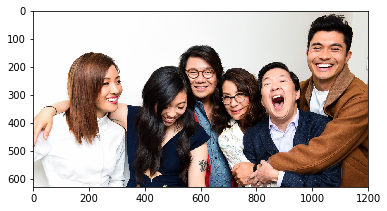

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
def crop_bbox(img, bbox):
    x,y,w,h = bbox
    return img[y:y+h, x:x+w]

In [32]:
for bbox in faces:
    f = crop_bbox(img, bbox)
    (fH, fW) = f.shape[:2]
    
    # ensure the face width and height are sufficiently large
    if fW < 20 or fH < 20:
        continue
    
    # Pre-process images (scaling, mean-subtraction, R-B color-swap)
    faceBlob = cv2.dnn.blobFromImage(f, 1.0 / 255,
        (96, 96), (0, 0, 0), swapRB=True, crop=False)
    
    embedder.setInput(faceBlob)
    vec = embedder.forward()
    
    print(vec)
#     plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
#     plt.show()

[[ 4.12741080e-02  6.61104023e-02 -1.27144903e-01 -8.45901743e-02
   4.29406501e-02  1.74916610e-01 -1.64770279e-02  3.45052108e-02
  -2.01675549e-01 -1.82019547e-02 -2.30691284e-02  5.22382073e-02
   1.12773925e-01 -1.33978933e-01 -8.73632953e-02  4.09736782e-02
  -5.25622182e-02 -1.08201699e-02 -7.08100200e-02  1.68715790e-01
   9.07518044e-02 -9.67811644e-02  7.83772543e-02  2.68460922e-02
  -6.68799132e-02  7.78377056e-02 -2.98846848e-02 -1.91473559e-01
   9.82495397e-03 -6.01337431e-03 -4.55588015e-05  5.10971919e-02
  -8.55603144e-02  1.00484639e-01 -6.58702701e-02  2.76194587e-02
  -5.27759455e-02  1.25428036e-01 -5.03851054e-03  6.94820518e-03
   5.61560644e-03 -1.02199204e-01  4.44177054e-02  1.40737414e-01
  -8.34262073e-02 -8.55549518e-03  2.29661509e-01  1.54414400e-02
  -2.26217121e-01  1.15891881e-01  3.93511876e-02 -1.12810463e-01
  -1.21181019e-01  3.68432738e-02  6.58978075e-02 -2.00040191e-02
  -1.59932245e-02  1.58153549e-01  5.73639907e-02 -1.44351631e-01
  -3.78929